In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
from mca import MCA
import prince
from kmodes.kmodes import KModes
from sklearn.cluster import KMeans
from scipy import interpolate
from scipy.spatial import ConvexHull

sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
clean_data = pd.read_csv("../data/clean_data_final.csv").drop("Unnamed: 0", axis=1)
clean_data

,cluster,how_old_are_you,overall_years_of_professional_experience,years_of_experience_in_field,highest_level_of_education_completed,gender,industry,payed,harmonized_salary,adjusted_annual_salary
0,0,25-34,5-7 years,5-7 years,Master's degree,Woman,Education,bad payed,55000.0,0.885018
1,4,25-34,8 - 10 years,5-7 years,College degree,Non-binary,Technology & Science,well payed,68796.0,1.793468
2,2,25-34,2 - 4 years,2 - 4 years,College degree,Woman,Banking & Insurance,bad payed,34000.0,0.547102
3,5,25-34,8 - 10 years,5-7 years,College degree,Woman,Non profit Organization,bad payed,62000.0,0.997657
4,5,25-34,8 - 10 years,5-7 years,College degree,Woman,Banking & Insurance,bad payed,60000.0,0.965475
...,...,...,...,...,...,...,...,...,...,...
22883,5,25-34,5-7 years,5-7 years,College degree,Woman,Unidentified,well payed,85000.0,1.367756
22884,1,35-44,11 - 20 years,2 - 4 years,College degree,Woman,Non profit Organization,bad payed,40000.0,0.643650
22885,0,25-34,11 - 20 years,11 - 20 years,Master's degree,Woman,Technology & Science,well payed,148000.0,2.381504
22886,2,25-34,2 - 4 years,2 - 4 years,College degree,Woman,Advertising,well payed,65000.0,1.045931


# Clusters obtained with KModes

In [3]:
clusters = clean_data.copy()

## Centroids

In [4]:
centroids = pd.read_csv("../data/centroids_final.csv").drop("Unnamed: 0", axis=1)
centroids

,gender,industry,highest_diploma,age,experience
0,Woman,Technology & Science,Master's degree,8 - 10 years,25-34
1,Woman,Banking & Insurance,College degree,11 - 20 years,35-44
2,Woman,Health,College degree,2 - 4 years,25-34
3,Woman,Education,Master's degree,11 - 20 years,35-44
4,Woman,Technology & Science,College degree,2 - 4 years,25-34
5,Woman,Non profit Organization,College degree,5-7 years,25-34


## Visualisation of clusters

### Repartition on cluster

Text(0, 0.5, 'Count')

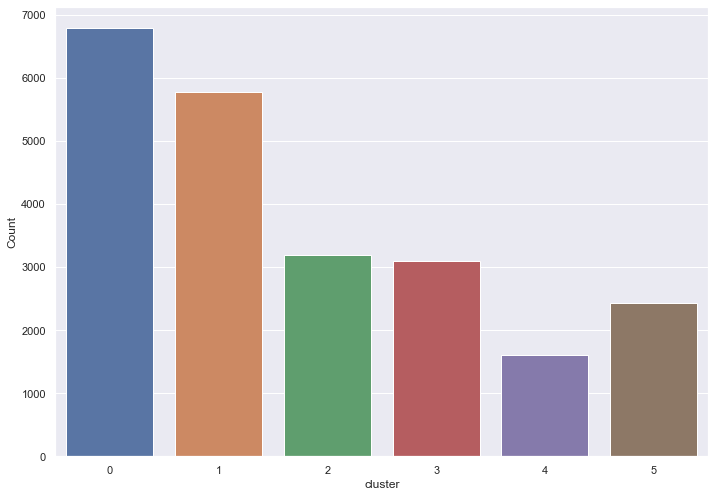

In [5]:
clusters_groupby = pd.DataFrame(clusters.groupby("cluster").size())
clusters_groupby
sns.barplot(data=clusters_groupby, x=clusters_groupby.index, y=0)
plt.ylabel("Count")

### Age

<AxesSubplot:xlabel='how_old_are_you', ylabel='count'>

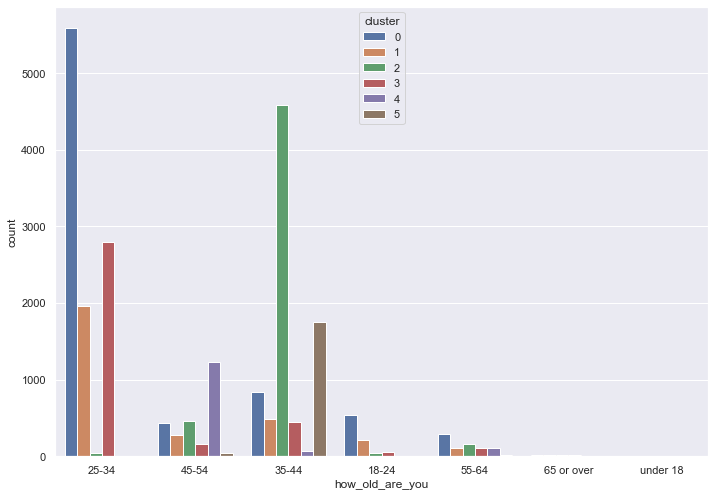

In [6]:
sns.countplot(data=clusters, x="how_old_are_you", hue="cluster")

### Overall years of experience

<AxesSubplot:xlabel='overall_years_of_professional_experience', ylabel='count'>

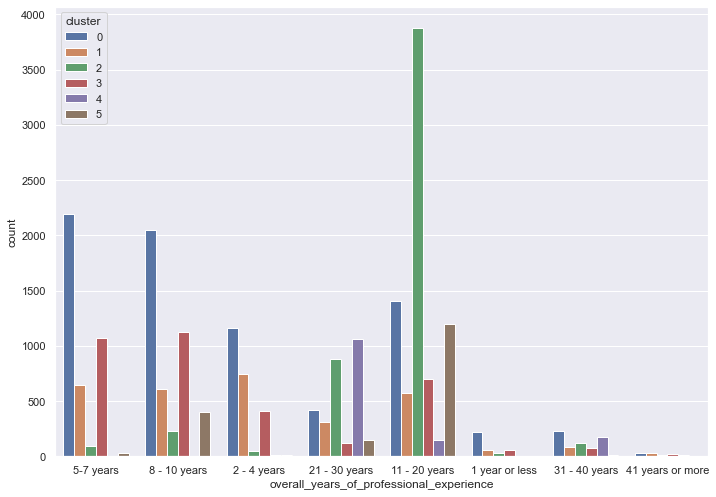

In [7]:
sns.countplot(data=clusters, x="overall_years_of_professional_experience", hue="cluster")

### Years of experience in field

<AxesSubplot:xlabel='years_of_experience_in_field', ylabel='count'>

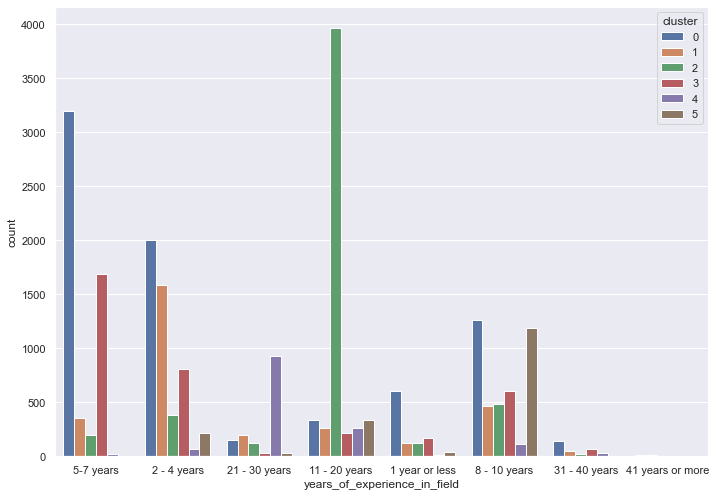

In [8]:
sns.countplot(data=clusters, x="years_of_experience_in_field", hue="cluster")

### Highest diploma

<AxesSubplot:xlabel='highest_level_of_education_completed', ylabel='count'>

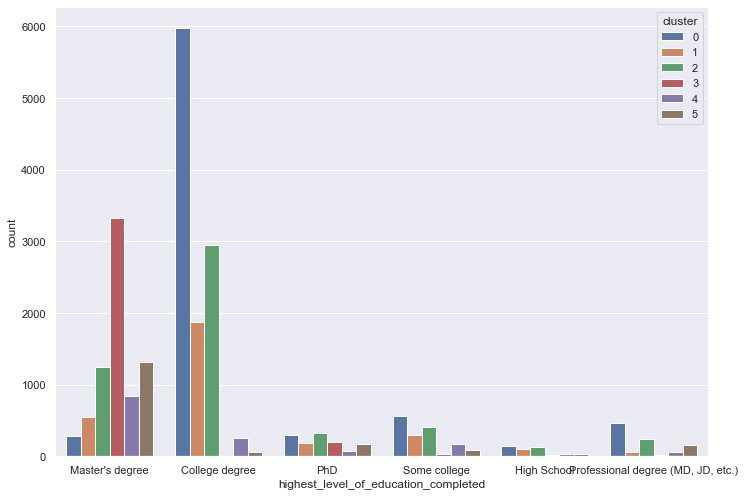

In [9]:
sns.countplot(data=clusters, x="highest_level_of_education_completed", hue="cluster")

### Gender

<AxesSubplot:xlabel='gender', ylabel='count'>

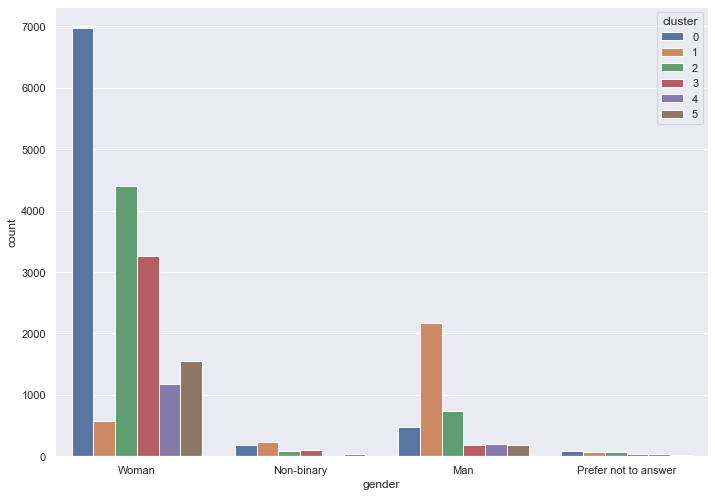

In [10]:
sns.countplot(data=clusters, x="gender", hue="cluster")

### Industry

<AxesSubplot:xlabel='count', ylabel='industry'>

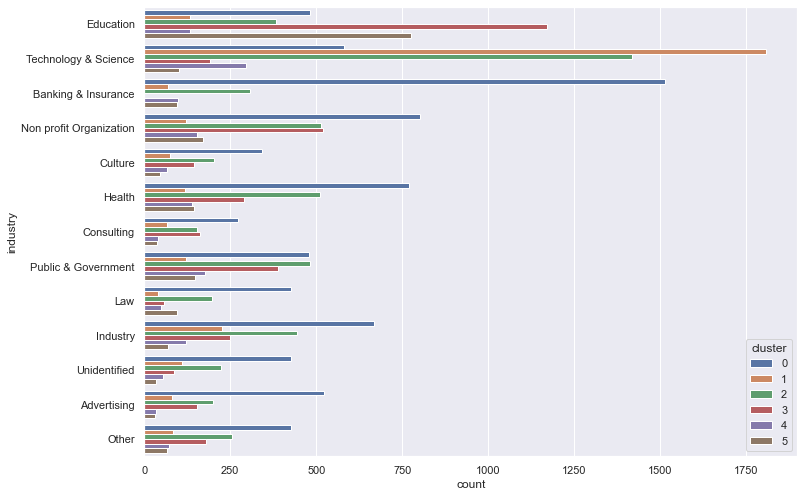

In [11]:
sns.countplot(data=clusters, y="industry", hue="cluster")

### Salary category

<AxesSubplot:xlabel='payed', ylabel='count'>

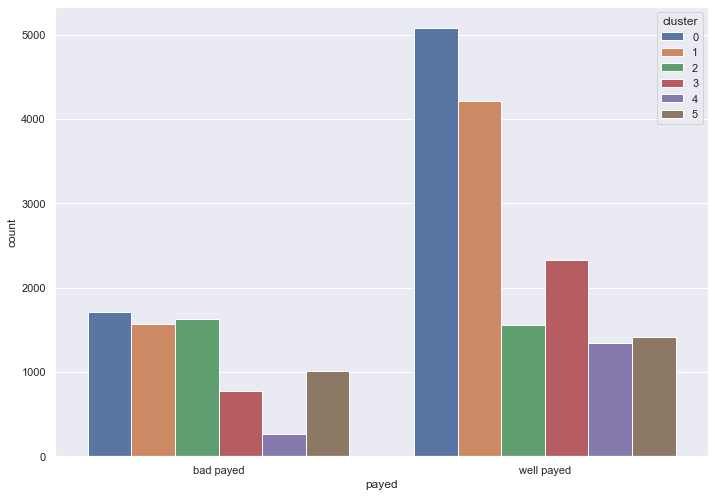

In [6]:
sns.countplot(data=clusters, x="payed", hue="cluster")

### Adjusted annual salary

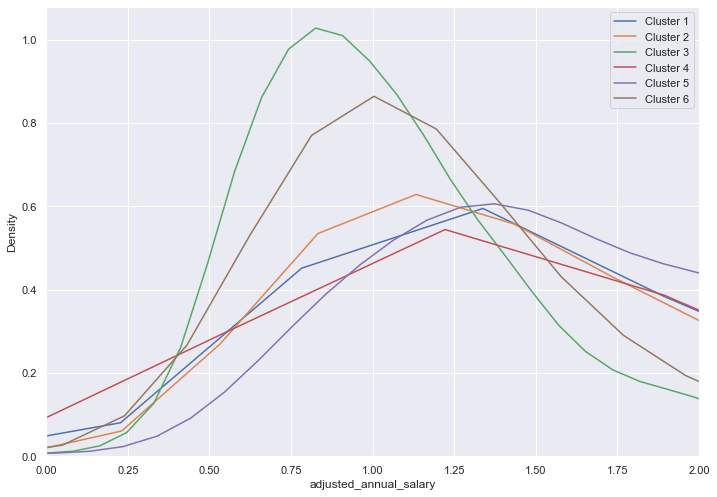

In [7]:
sns.kdeplot(clusters[clusters["cluster"]==0]["adjusted_annual_salary"], label="Cluster 1")
sns.kdeplot(clusters[clusters["cluster"]==1]["adjusted_annual_salary"], label="Cluster 2")
sns.kdeplot(clusters[clusters["cluster"]==2]["adjusted_annual_salary"], label="Cluster 3")
sns.kdeplot(clusters[clusters["cluster"]==3]["adjusted_annual_salary"], label="Cluster 4")
sns.kdeplot(clusters[clusters["cluster"]==4]["adjusted_annual_salary"], label="Cluster 5")
sns.kdeplot(clusters[clusters["cluster"]==5]["adjusted_annual_salary"], label="Cluster 6")
plt.xlim(xmax=2, xmin=0)
plt.legend()
plt.show()

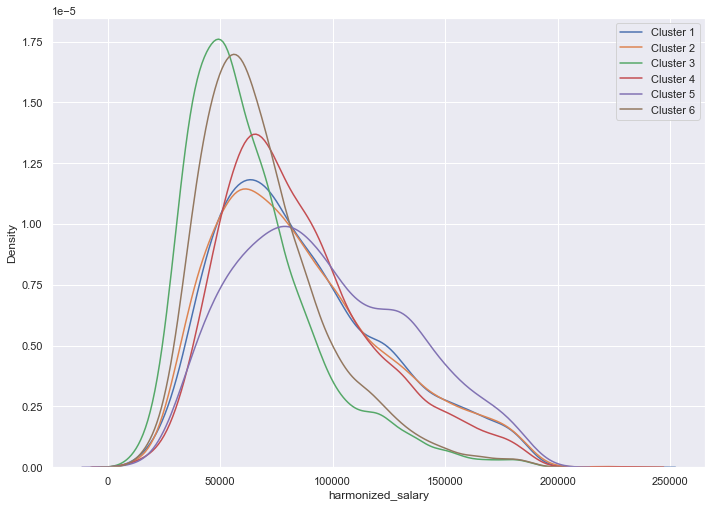

In [8]:
sns.kdeplot(clusters[clusters["cluster"]==0]["harmonized_salary"], label="Cluster 1")
sns.kdeplot(clusters[clusters["cluster"]==1]["harmonized_salary"], label="Cluster 2")
sns.kdeplot(clusters[clusters["cluster"]==2]["harmonized_salary"], label="Cluster 3")
sns.kdeplot(clusters[clusters["cluster"]==3]["harmonized_salary"], label="Cluster 4")
sns.kdeplot(clusters[clusters["cluster"]==4]["harmonized_salary"], label="Cluster 5")
sns.kdeplot(clusters[clusters["cluster"]==5]["harmonized_salary"], label="Cluster 6")
plt.legend()
plt.show()

# ACM on variable 

In [14]:
acm = pd.read_csv("../data/acm_data_final.csv").drop("Unnamed: 0", axis=1)
acm.columns = ["index", "X1", "X2", "X3", "X4", "X5", "X6", "X7", "X8", "X9", "X10", "color"]
acm

,index,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,color
0,18-24,-1.686364,1.741309,-1.000471,0.493504,-2.212185,1.396107,0.074928,-0.555971,-1.286686,0.387776,Age
1,25-34,-0.657110,-0.085307,-0.129303,0.121621,0.496690,-0.343803,0.085389,-0.099699,0.044249,0.023993,Age
2,35-44,0.492943,-0.570299,0.021390,-0.244966,-0.227630,0.664962,-0.265993,0.103978,0.122206,-0.107535,Age
3,45-54,1.141953,0.572122,0.175091,-0.182339,-1.002343,-1.325874,0.921828,0.378156,-0.109599,0.011192,Age
4,55-64,1.439673,2.704503,1.646192,0.835655,0.988375,-0.176324,-2.281004,-0.667249,-0.060549,0.246421,Age
5,65 or over,1.701665,4.621928,3.103477,1.368571,5.670968,6.461151,8.245672,2.795587,-0.978003,0.544360,Age
6,under 18,-1.310811,0.885018,1.385097,0.740196,-3.037628,1.916921,0.938270,-0.142186,11.273757,3.822640,Age
7,1 year or less,-1.282076,1.113017,-0.468243,0.540375,-1.902281,1.205408,0.146533,-0.829356,-0.955233,0.267834,Experience
8,11 - 20 years,0.834416,-0.426397,0.029456,-0.372243,-0.493459,0.657407,-0.321307,0.277960,0.049698,-0.024730,Experience
9,2 - 4 years,-0.846693,0.249550,-0.226099,0.185113,0.016149,-0.139529,0.126383,-0.238092,-0.012943,0.108333,Experience


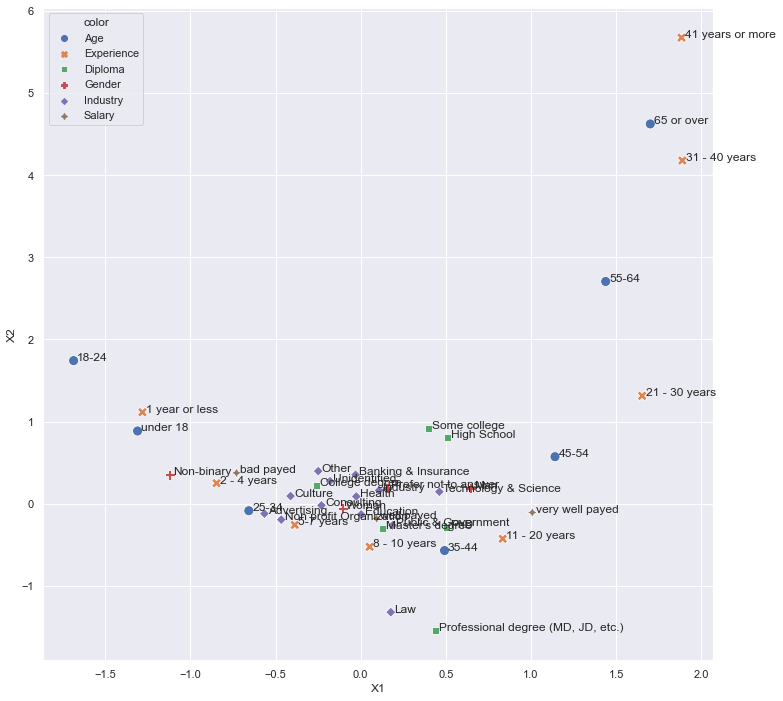

In [15]:
i="X1"
j="X2"
plt.figure(figsize=(12, 12))
ax = sns.scatterplot(data=acm, x=i, y=j, style="color", hue="color", s=100)
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(acm[i], acm[j], acm["index"], plt.gca())  
plt.show()

In [16]:
row_points = pd.read_csv("../data/mca_row_points_final.csv").drop("Unnamed: 0", axis=1)
row_points["payed"] = clean_data["payed"]
row_points

,0,1,2,3,4,5,6,7,8,9,payed
0,0.457264,-0.131519,0.109377,0.938762,0.214354,-0.277551,0.223392,-0.356309,0.340254,-0.083592,bad payed
1,0.594332,0.034963,-0.366052,-0.548563,0.569249,-0.218397,0.100420,-0.281831,0.904031,0.666082,well payed
2,0.802786,0.328672,0.055180,-0.030220,-0.051810,-0.199831,-0.085372,0.394032,0.017800,-0.376389,bad payed
3,0.764620,-0.002591,0.048102,0.384089,0.289473,-0.356254,0.002928,0.430119,0.125241,0.113553,bad payed
4,0.654458,0.168287,0.039868,0.046283,0.178019,-0.301755,-0.107331,0.492966,0.101559,-0.457895,bad payed
...,...,...,...,...,...,...,...,...,...,...,...
22883,0.377447,-0.032367,-0.102797,-0.228148,0.519040,-0.277165,-0.031699,0.445025,-0.146689,-0.532111,well payed
22884,0.558301,0.006594,-0.022198,0.373142,-0.194121,0.107970,-0.099041,0.409854,0.059061,0.127217,bad payed
22885,-0.264716,-0.293214,-0.321191,-0.086517,0.205379,0.103317,-0.059799,-0.152881,-0.022058,0.329495,well payed
22886,0.651768,-0.002624,-0.082444,-0.262199,0.462147,-0.393863,-0.110422,0.245786,-0.689491,-0.701053,well payed


Text(0, 0.5, 'Second factorial axe')

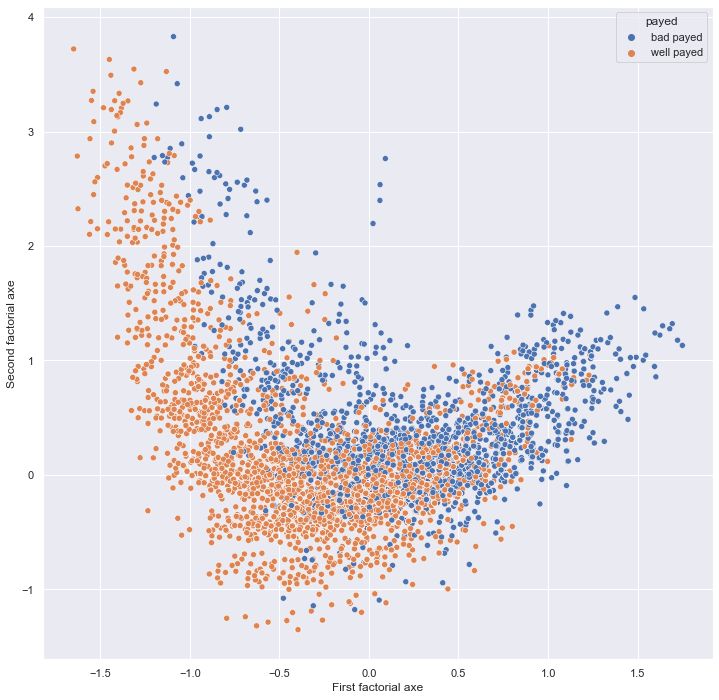

In [17]:
i="0"
j="1"
plt.figure(figsize=(12, 12))
sns.scatterplot(data=row_points, x=i, y=j, hue="payed")
plt.xlabel("First factorial axe")
plt.ylabel("Second factorial axe")

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    row_points.drop("payed", axis=1),
    row_points["payed"],
    train_size=0.8,
    random_state=29
)
X_train

,0,1,2,3,4,5,6,7,8,9
3616,-0.326903,-0.105545,-0.356175,0.283414,-0.295047,0.634625,-0.237631,0.244787,0.634647,0.129858
6461,0.112241,-0.169224,-0.236802,-0.435515,0.481486,-0.101327,-0.031397,-0.101095,-0.094277,-0.032373
22262,0.390068,-0.036921,0.044373,-0.048130,0.171750,-0.214093,-0.038707,-0.077959,-0.452347,0.538854
6715,-0.070097,-0.366496,-0.132830,-0.126950,0.081507,0.248191,-0.226629,-0.057697,-0.955891,0.384955
7179,-1.121260,0.433959,-0.018536,0.627708,-0.681060,-1.165439,1.139702,-1.238093,0.034774,-0.778276
...,...,...,...,...,...,...,...,...,...,...
10601,0.642014,0.090519,0.242543,0.440432,-0.064188,-0.129176,0.097967,0.124285,0.174082,0.052727
864,0.744257,0.257299,0.056701,-0.070200,-0.435023,0.201496,0.008391,-0.099577,-0.515466,0.323209
808,-0.726089,-0.553730,-0.140139,0.493510,-0.259078,0.449273,-0.038289,-0.831034,-0.214103,-0.100474
10749,-0.008542,-0.086543,-0.415871,-0.660783,0.514373,-0.009321,-0.018650,-0.122935,-0.309617,-0.046440


              precision    recall  f1-score   support

   bad payed       0.93      0.87      0.90      1404
  well payed       0.94      0.97      0.96      3174

    accuracy                           0.94      4578
   macro avg       0.93      0.92      0.93      4578
weighted avg       0.94      0.94      0.94      4578



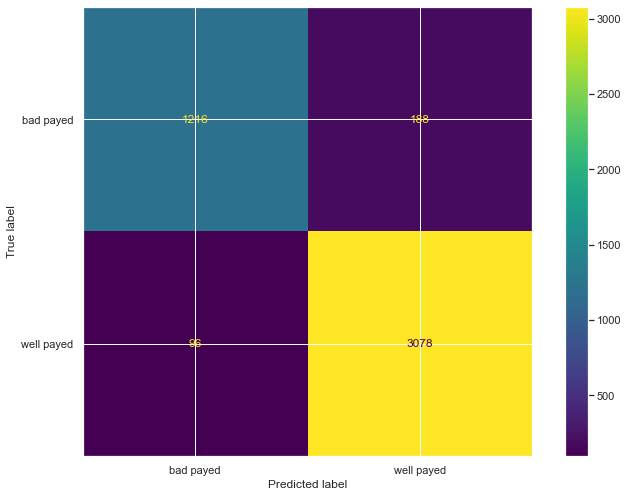

In [20]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)
print(classification_report(y_true=y_test, y_pred=predictions))
cm = confusion_matrix(y_true=y_test, y_pred=predictions, labels=lr.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels=lr.classes_)
disp.plot()

                 precision    recall  f1-score   support

      bad payed       0.96      0.97      0.97      1404
very well payed       0.97      0.94      0.95       755
     well payed       0.97      0.97      0.97      2419

       accuracy                           0.96      4578
      macro avg       0.97      0.96      0.96      4578
   weighted avg       0.96      0.96      0.96      4578



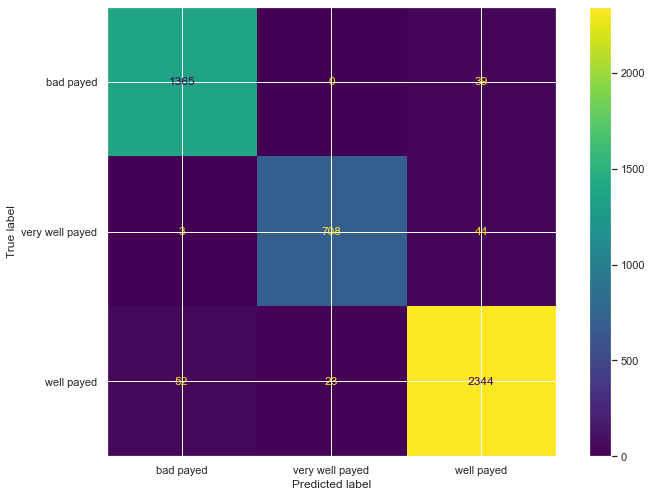

In [78]:
svm = SVC()
svm.fit(X_train, y_train)
predictions = svm.predict(X_test)
print(classification_report(y_true=y_test, y_pred=predictions))
cm = confusion_matrix(y_true=y_test, y_pred=predictions, labels=lr.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels=lr.classes_)
disp.plot()